In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

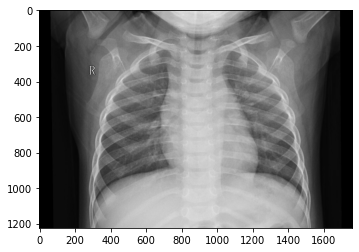

In [80]:
train_dir = r"D:\Python projects\Machine Learning\Machine_learning Project 1\xray_dataset_covid19\train"
test_dir = r"D:\Python projects\Machine Learning\Machine_learning Project 1\xray_dataset_covid19\test"

CATEGORIES = ['NORMAL', 'PNEUMONIA']

for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

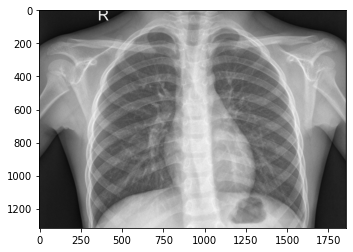

In [81]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [82]:
print(img_array.shape)

(1317, 1857, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

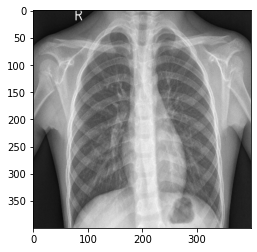

In [83]:
img_size = 400

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)

plt.show

In [84]:
train_data = []
test_data = []
def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
            
get_data(train_dir, train_data)
get_data(test_dir, test_data)

In [85]:
len(train_data), len(test_data)

(148, 40)

In [86]:
import random 
random.shuffle(train_data)
random.shuffle(test_data)

In [87]:
train_data[0]

[array([[[40, 40, 40],
         [34, 34, 34],
         [41, 41, 41],
         ...,
         [83, 83, 83],
         [80, 80, 80],
         [75, 75, 75]],
 
        [[37, 37, 37],
         [33, 33, 33],
         [39, 39, 39],
         ...,
         [81, 81, 81],
         [81, 81, 81],
         [77, 77, 77]],
 
        [[35, 35, 35],
         [33, 33, 33],
         [38, 38, 38],
         ...,
         [79, 79, 79],
         [79, 79, 79],
         [80, 80, 80]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 0]

In [88]:
import numpy as np

X_train = []
y_train = []
X_test = []
y_test = []

def split_train_test(data, img, labels):
    for features, label in data:
        img.append(features)
        labels.append(label)
                          
split_train_test(train_data, X_train,y_train)
split_train_test(test_data, X_test,y_test)         

In [89]:
X_train = np.array(X_train).reshape(-1,img_size, img_size,3)
X_test = np.array(X_test).reshape(-1,img_size, img_size,3)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [90]:
len(X_train)

148

In [91]:
y_train[:5]

array([0, 1, 0, 1, 1])

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten

In [106]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    #dense layers
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(50, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
])

In [107]:
cnn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [108]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 398, 398, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 199, 199, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 64)      

In [109]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 9s 1s/step - loss: 140.3130 - accuracy: 0.5338
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 34.3937 - accuracy: 0.5068
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 8.3171 - accuracy: 0.5203
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 1.1395 - accuracy: 0.6689
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 0.2906 - accuracy: 0.8581
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.3114 - accuracy: 0.8851
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.2523 - accuracy: 0.9189
Epoch 8/10
5/5 [==============================] - 7s 1s/step - loss: 0.2704 - accuracy: 0.9189
Epoch 9/10
5/5 [==============================] - 7s 1s/step - loss: 0.1162 - accuracy: 0.9527
Epoch 10/10
5/5 [==============================] - 7s 1s/step - loss: 0.2463 - accuracy: 0.9595


In [110]:
cnn.evaluate(X_test,y_test)

2/2 [==============================] - 1s 136ms/step - loss: 0.1506 - accuracy: 0.9750


[0.1505676507949829, 0.9750000238418579]

In [111]:
y_pred = cnn.predict(X_test)

y_predicted = []
for i in y_pred:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [112]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [113]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(33.0, 0.5, 'Truth')

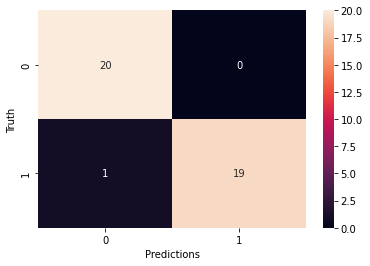

In [114]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")